<a href="https://colab.research.google.com/github/minatakegami/mtakegami_BMS225A/blob/main/code/bms225a_ds_workshop2_student_notebook_2025_10_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMS-225a DS Workshop #2

## Objective
The primary objective of this workshop is to analyze single-cell data to understand the distribution of cell types across different patient samples, and prepare a processed dataset that can be used to reproduce Fig.2e in Mennillo et al. 2024:

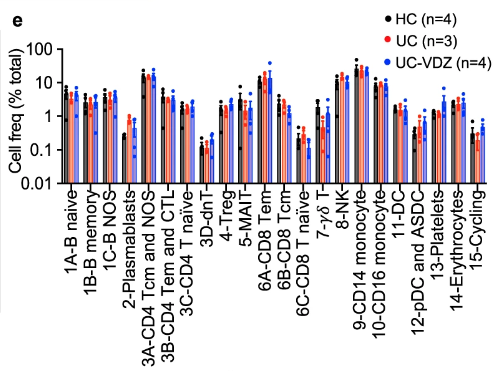




Mennillo, E., Kim, Y.J., Lee, G. et al. Single-cell and spatial multi-omics highlight effects of anti-integrin therapy across cellular compartments in ulcerative colitis. Nat Commun 15, 1493 (2024). https://doi.org/10.1038/s41467-024-45665-6

## Workflow Summary
We will start with a DataFrame containing information about diffenrent cell types (peripheral blood leukocytes) from multiple patients across three conditions (Healthy Controls, Ulceritive Colitis, and Ulceritive Colitis + medication). The main steps are:

1. **Data Transformation**:
    - Pivot the dataset to generate a table that shows the counts of different cell types for each patient.
    - Normalize these counts to obtain cell type proportions as percentages.

2. **Data Reshaping**:
    - Reshape the resulting dataset to facilitate downstream analysis by creating a long format, where each row represents a particular patient, cell type, and its corresponding percentage.

3. **Data Merging**:
    - Merge this reshaped data with patient-specific condition information to enable comparison between the three patient groups.

---

## import pandas and load data

In [158]:
import pandas as pd

# (optional) Show more columns in output
pd.set_option('display.max_columns', 50)  # you can also set 'display.max_rows'

In [159]:
### load the csv file

cell_metadata = pd.read_csv('cell_metadata.csv', index_col=0)

## STEP 0. Inspect data and prepare the dataframe we'll work with

In [160]:
cell_metadata

,orig.ident,nCount_RNA,nFeature_RNA,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,percent.mt,percent.ribo,S.Score,G2M.Score,Phase,SAMPLE.by.SNPs,nCount_SCT,nFeature_SCT,DF.DROPLET.TYPE,LIBRARY,CoLabs_ID,CoLabs_patient,condition,MK final coarse_V2,MK final fine annotations_V2,MK final coarse_V2 a4B7,MK final fine annotations_V2 a4B7
cell_barcode,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-POOL-SCG11,2446.0,1087,355,527,SNG,"4,4",6.500409,32.420278,-0.041667,-0.147959,G1,P.S11.C4,1901.0,1078,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,07_gd T cells,07_gd T,07_gd T,07_gd T
AAACCTGAGTCCTCCT-1_1,XAUT1-POOL-SCG11,179.0,137,26,27,SNG,"2,2",11.173184,26.815642,0.000000,-0.009044,S,P.S11.C2,1099.0,275,Singlet,XAUT1-POOL-SCG11,XAUT1-HS3-BLD1-SCG11,XAUT1-HS3,HC,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts
AAACCTGAGTGTCCAT-1_1,XAUT1-POOL-SCG11,2798.0,890,256,391,SNG,"3,3",3.752680,55.611151,-0.025000,-0.262274,G1,P.S11.C3,1872.0,872,Singlet,XAUT1-POOL-SCG11,XAUT1-HS4-BLD1-SCG11,XAUT1-HS4,HC,03_CD4 T,03C_CD4_NAIVE,03_CD4,03C_CD4_NAIVE
AAACCTGAGTTCGCAT-1_1,XAUT1-POOL-SCG11,2963.0,1123,374,560,SNG,"4,4",3.881201,40.229497,-0.016667,-0.149974,G1,P.S11.C4,1956.0,1090,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,03_CD4 T,03A_CD4_TCM and NOS,03_CD4 a4B7,03A_CD4_TCM and NOS a4B7
AAACCTGCACATGACT-1_1,XAUT1-POOL-SCG11,2737.0,1213,418,625,SNG,"9,9",6.936838,31.288792,-0.029167,-0.118966,G1,P.S11.C9,1938.0,1189,Singlet,XAUT1-POOL-SCG11,XAUT1-HS12-BLD1-SCG11,XAUT1-HS12,UCV,06_CD8 T,06A_CD8 TEM,06_CD8,06A_CD8 TEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGACTCAT-1_4,XAUT1-POOL-SCG14,1492.0,578,142,188,SNG,"3,3",11.713521,44.912985,-0.025210,-0.069514,G1,P.S14.C3,2081.0,583,Singlet,XAUT1-POOL-SCG14,XAUT1-HS9-BLD1-SCG14,XAUT1-HS9,UCV,03_CD4 T,03B_CD4 TEM and CTL,03_CD4,03B_CD4 TEM and CTL
TTTGTCAGTGGCGAAT-1_4,XAUT1-POOL-SCG14,7067.0,1987,794,1677,SNG,"2,2",6.424225,30.408943,0.045098,-0.236317,S,P.S14.C2,2666.0,1175,Singlet,XAUT1-POOL-SCG14,XAUT1-HS7-BLD1-SCG14,XAUT1-HS7,UCNB,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes
TTTGTCAGTTATTCTC-1_4,XAUT1-POOL-SCG14,1753.0,717,322,431,SNG,"3,3",9.925841,41.129492,-0.016807,-0.092072,G1,P.S14.C3,2114.0,717,Singlet,XAUT1-POOL-SCG14,XAUT1-HS9-BLD1-SCG14,XAUT1-HS9,UCV,01_B,01A_B_naive,01_B,01A_B_naive


Inspect the data

In [161]:
## How many cells per patient? --> .value_counts()

cell_metadata['CoLabs_patient'].value_counts()

,count
CoLabs_patient,
XAUT1-HS6,3474
XAUT1-HS2,3120
XAUT1-HS7,2356
XAUT1-HS4,1761
XAUT1-HS3,1699
XAUT1-HS10,1669
XAUT1-HS12,1565
XAUT1-HS9,1473
XAUT1-HS8,1111


In [162]:
# How many unique values in these columns? --> .nunique()

cell_metadata[['CoLabs_patient', 'MK final coarse_V2',	'condition']].nunique()

,0
CoLabs_patient,11
MK final coarse_V2,15
condition,3


In [163]:
# Group by example: average number of reads per sample id

index_columns=['CoLabs_ID']
values_column = 'nCount_RNA'
aggregation_function = 'mean'

cell_metadata.groupby(index_columns)[values_column].agg(aggregation_function)

,nCount_RNA
CoLabs_ID,
XAUT1-HS1-BLD1-SCG11,1738.792308
XAUT1-HS1-BLD1-SCG12,1817.833828
XAUT1-HS1-BLD1-SCG13,1524.750000
XAUT1-HS1-BLD1-SCG14,2547.316092
XAUT1-HS10-BLD1-SCG11,2015.767338
XAUT1-HS10-BLD1-SCG12,2518.651163
XAUT1-HS10-BLD1-SCG13,2368.620805
XAUT1-HS10-BLD1-SCG14,3120.556164
XAUT1-HS11-BLD1-SCG11,2084.685039


In [164]:
# save the above result to a new variable
average_reads = cell_metadata.groupby(index_columns)[values_column].agg(aggregation_function) ## same function as above

In [165]:
average_reads.describe()

,nCount_RNA
count,44.000000
mean,2458.179903
std,395.879101
min,1524.750000
25%,2238.701454
50%,2405.851826
75%,2643.239129
max,3348.615625


In [166]:
# we can also calculate mean and std directly by using .mean() and .std()
mu=average_reads.mean()
sigma=average_reads.std()

In [167]:
# outliers ?
average_reads[ (average_reads>mu + 2*sigma) | (average_reads<mu - 2*sigma)]

,nCount_RNA
CoLabs_ID,
XAUT1-HS1-BLD1-SCG13,1524.750000
XAUT1-HS9-BLD1-SCG14,3348.615625


In [168]:
# we can also compute it like this:
average_reads[ (average_reads - mu).abs() > 2*sigma ]

,nCount_RNA
CoLabs_ID,
XAUT1-HS1-BLD1-SCG13,1524.750000
XAUT1-HS9-BLD1-SCG14,3348.615625


In [169]:
#If we want we can remove these ids from our data
keep = average_reads[ (average_reads - mu).abs() < 2*sigma ].index
filtered_cell_metadata = cell_metadata[ cell_metadata['CoLabs_ID'].isin(keep) ]

In [170]:
filtered_cell_metadata

,orig.ident,nCount_RNA,nFeature_RNA,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,percent.mt,percent.ribo,S.Score,G2M.Score,Phase,SAMPLE.by.SNPs,nCount_SCT,nFeature_SCT,DF.DROPLET.TYPE,LIBRARY,CoLabs_ID,CoLabs_patient,condition,MK final coarse_V2,MK final fine annotations_V2,MK final coarse_V2 a4B7,MK final fine annotations_V2 a4B7
cell_barcode,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-POOL-SCG11,2446.0,1087,355,527,SNG,"4,4",6.500409,32.420278,-0.041667,-0.147959,G1,P.S11.C4,1901.0,1078,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,07_gd T cells,07_gd T,07_gd T,07_gd T
AAACCTGAGTCCTCCT-1_1,XAUT1-POOL-SCG11,179.0,137,26,27,SNG,"2,2",11.173184,26.815642,0.000000,-0.009044,S,P.S11.C2,1099.0,275,Singlet,XAUT1-POOL-SCG11,XAUT1-HS3-BLD1-SCG11,XAUT1-HS3,HC,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts
AAACCTGAGTGTCCAT-1_1,XAUT1-POOL-SCG11,2798.0,890,256,391,SNG,"3,3",3.752680,55.611151,-0.025000,-0.262274,G1,P.S11.C3,1872.0,872,Singlet,XAUT1-POOL-SCG11,XAUT1-HS4-BLD1-SCG11,XAUT1-HS4,HC,03_CD4 T,03C_CD4_NAIVE,03_CD4,03C_CD4_NAIVE
AAACCTGAGTTCGCAT-1_1,XAUT1-POOL-SCG11,2963.0,1123,374,560,SNG,"4,4",3.881201,40.229497,-0.016667,-0.149974,G1,P.S11.C4,1956.0,1090,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,03_CD4 T,03A_CD4_TCM and NOS,03_CD4 a4B7,03A_CD4_TCM and NOS a4B7
AAACCTGCACATGACT-1_1,XAUT1-POOL-SCG11,2737.0,1213,418,625,SNG,"9,9",6.936838,31.288792,-0.029167,-0.118966,G1,P.S11.C9,1938.0,1189,Singlet,XAUT1-POOL-SCG11,XAUT1-HS12-BLD1-SCG11,XAUT1-HS12,UCV,06_CD8 T,06A_CD8 TEM,06_CD8,06A_CD8 TEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGTACCT-1_4,XAUT1-POOL-SCG14,5411.0,1674,712,1378,SNG,"10,10",8.131584,24.727407,-0.063025,-0.211100,G1,P.S14.C10,2927.0,1451,Singlet,XAUT1-POOL-SCG14,XAUT1-HS10-BLD1-SCG14,XAUT1-HS10,UCV,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes
TTTGTCAGTACAAGTA-1_4,XAUT1-POOL-SCG14,3171.0,1160,426,637,SNG,"1,1",6.843267,24.818669,-0.033613,-0.112174,G1,P.S14.C1,2658.0,1158,Singlet,XAUT1-POOL-SCG14,XAUT1-HS6-BLD1-SCG14,XAUT1-HS6,UCNB,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes
TTTGTCAGTGGCGAAT-1_4,XAUT1-POOL-SCG14,7067.0,1987,794,1677,SNG,"2,2",6.424225,30.408943,0.045098,-0.236317,S,P.S14.C2,2666.0,1175,Singlet,XAUT1-POOL-SCG14,XAUT1-HS7-BLD1-SCG14,XAUT1-HS7,UCNB,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes,09_CD14 classical monocytes


In [171]:
# if we decide to filter:
# cell_metadata = filtered_cell_metadata.copy()

In [172]:
cell_metadata.head()

,orig.ident,nCount_RNA,nFeature_RNA,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,percent.mt,percent.ribo,S.Score,G2M.Score,Phase,SAMPLE.by.SNPs,nCount_SCT,nFeature_SCT,DF.DROPLET.TYPE,LIBRARY,CoLabs_ID,CoLabs_patient,condition,MK final coarse_V2,MK final fine annotations_V2,MK final coarse_V2 a4B7,MK final fine annotations_V2 a4B7
cell_barcode,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-POOL-SCG11,2446.0,1087,355,527,SNG,"4,4",6.500409,32.420278,-0.041667,-0.147959,G1,P.S11.C4,1901.0,1078,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,07_gd T cells,07_gd T,07_gd T,07_gd T
AAACCTGAGTCCTCCT-1_1,XAUT1-POOL-SCG11,179.0,137,26,27,SNG,"2,2",11.173184,26.815642,0.000000,-0.009044,S,P.S11.C2,1099.0,275,Singlet,XAUT1-POOL-SCG11,XAUT1-HS3-BLD1-SCG11,XAUT1-HS3,HC,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts,02_Plasmablasts
AAACCTGAGTGTCCAT-1_1,XAUT1-POOL-SCG11,2798.0,890,256,391,SNG,"3,3",3.752680,55.611151,-0.025000,-0.262274,G1,P.S11.C3,1872.0,872,Singlet,XAUT1-POOL-SCG11,XAUT1-HS4-BLD1-SCG11,XAUT1-HS4,HC,03_CD4 T,03C_CD4_NAIVE,03_CD4,03C_CD4_NAIVE
AAACCTGAGTTCGCAT-1_1,XAUT1-POOL-SCG11,2963.0,1123,374,560,SNG,"4,4",3.881201,40.229497,-0.016667,-0.149974,G1,P.S11.C4,1956.0,1090,Singlet,XAUT1-POOL-SCG11,XAUT1-HS2-BLD1-SCG11,XAUT1-HS2,HC,03_CD4 T,03A_CD4_TCM and NOS,03_CD4 a4B7,03A_CD4_TCM and NOS a4B7
AAACCTGCACATGACT-1_1,XAUT1-POOL-SCG11,2737.0,1213,418,625,SNG,"9,9",6.936838,31.288792,-0.029167,-0.118966,G1,P.S11.C9,1938.0,1189,Singlet,XAUT1-POOL-SCG11,XAUT1-HS12-BLD1-SCG11,XAUT1-HS12,UCV,06_CD8 T,06A_CD8 TEM,06_CD8,06A_CD8 TEM


> For reproducing Fig.2e, we only need the columns `CoLabs_patient`, `MK final coarse_V2`, and  `condition` from this DataFrame

In [173]:
### select these columns from adata.obs and assign the result to a new dataframe, lets call it cell_df
relevant_columns = ['CoLabs_patient', 'MK final coarse_V2', 'condition']


#####################################
cell_df = cell_metadata[relevant_columns]


#####################################

In [174]:
cell_df

,CoLabs_patient,MK final coarse_V2,condition
cell_barcode,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-HS2,07_gd T cells,HC
AAACCTGAGTCCTCCT-1_1,XAUT1-HS3,02_Plasmablasts,HC
AAACCTGAGTGTCCAT-1_1,XAUT1-HS4,03_CD4 T,HC
AAACCTGAGTTCGCAT-1_1,XAUT1-HS2,03_CD4 T,HC
AAACCTGCACATGACT-1_1,XAUT1-HS12,06_CD8 T,UCV
...,...,...,...
TTTGTCAGTGACTCAT-1_4,XAUT1-HS9,03_CD4 T,UCV
TTTGTCAGTGGCGAAT-1_4,XAUT1-HS7,09_CD14 classical monocytes,UCNB
TTTGTCAGTTATTCTC-1_4,XAUT1-HS9,01_B,UCV


In [175]:
### rename these columns for clarity. We can use the .rename() function that takes as input a dictionary (columns parameter)
rename_dictionary = {'CoLabs_patient' : 'patient',
                     'MK final coarse_V2': 'cell_type'}


##########################################################################
cell_df.rename(columns=rename_dictionary, inplace=True)


##########################################################################

/tmp/ipython-input-2853657872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df.rename(columns=rename_dictionary, inplace=True)


In [176]:
cell_df

,patient,cell_type,condition
cell_barcode,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-HS2,07_gd T cells,HC
AAACCTGAGTCCTCCT-1_1,XAUT1-HS3,02_Plasmablasts,HC
AAACCTGAGTGTCCAT-1_1,XAUT1-HS4,03_CD4 T,HC
AAACCTGAGTTCGCAT-1_1,XAUT1-HS2,03_CD4 T,HC
AAACCTGCACATGACT-1_1,XAUT1-HS12,06_CD8 T,UCV
...,...,...,...
TTTGTCAGTGACTCAT-1_4,XAUT1-HS9,03_CD4 T,UCV
TTTGTCAGTGGCGAAT-1_4,XAUT1-HS7,09_CD14 classical monocytes,UCNB
TTTGTCAGTTATTCTC-1_4,XAUT1-HS9,01_B,UCV


In [177]:
# @title Compact version of what we are going to do today
def get_cell_type_percentages(obs, sample_column, celltype_column, condition_column):
  return (
          obs.pivot_table(
                index=sample_column,
                columns=celltype_column,
                aggfunc='size',
                observed=True,
                fill_value=0) # Pivot table to get counts
          .pipe(lambda df: df.div(df.sum(axis=1)/100, axis=0)) # Normalize rows to sum to 100
          .unstack() # Reshape to long format
          .rename('cell_type_pct') # Rename the resulting column
          .reset_index() # Reset the index
          .merge(obs[[sample_column, condition_column]].drop_duplicates(subset=sample_column),
                  on=sample_column)  # Merge condition data
         )

### Call the function:
get_cell_type_percentages(obs=cell_df,
                          sample_column='patient',
                          celltype_column='cell_type',
                          condition_column = 'condition')

,cell_type,patient,cell_type_pct,condition
0,01_B,XAUT1-HS1,17.130145,HC
1,01_B,XAUT1-HS10,13.121630,UCV
2,01_B,XAUT1-HS11,14.157527,UCV
3,01_B,XAUT1-HS12,2.300319,UCV
4,01_B,XAUT1-HS2,3.653846,HC
...,...,...,...,...
160,15_Cycling,XAUT1-HS4,0.283930,HC
161,15_Cycling,XAUT1-HS6,0.287853,UCNB
162,15_Cycling,XAUT1-HS7,0.297114,UCNB
163,15_Cycling,XAUT1-HS8,0.000000,UCNB


## STEP 1. Count the number of cells within each celltype for each individual patient

### Understanding our usecase of pivot table

Here we will create an toy dataset that is unrelated to the one we are working on, just for illustration purposes

In [178]:
## Example dataset for illustration purposes
example_data = pd.DataFrame({
    'patient': ['P1', 'P1', 'P1', 'P2', 'P2', 'P3', 'P3', 'P3', 'P4', 'P4'],
    'cell_type': ['T-cell', 'B-cell', 'T-cell', 'T-cell', 'NK-cell', 'B-cell', 'B-cell', 'NK-cell', 'T-cell', 'T-cell']
}).astype('category')
example_data

,patient,cell_type
0,P1,T-cell
1,P1,B-cell
2,P1,T-cell
3,P2,T-cell
4,P2,NK-cell
5,P3,B-cell
6,P3,B-cell
7,P3,NK-cell
8,P4,T-cell
9,P4,T-cell


In [179]:
#Pivot_table function
example_data.pivot_table(index='patient', columns='cell_type', aggfunc='size',)

/tmp/ipython-input-114604272.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  example_data.pivot_table(index='patient', columns='cell_type', aggfunc='size',)


cell_type,B-cell,NK-cell,T-cell
patient,,,
P1,1,0,2
P2,0,1,1
P3,2,1,0
P4,0,0,2


- The `pivot_table()` function combines the `groupby` and `pivot` functions. We can get the same result with:
```
example_data.groupby(['patient','cell_type']).size().reset_index().pivot(index='patient',columns = 'cell_type')
```

- Here we use `pivot_table()` to count. This function can do more (see: pandas guide for [pivot-table](https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html#pivot-table))

### A) Pivot table to get `cell_type_counts`

In [180]:
# Pivot table usage:
# DataFrame.pivot_table(
#     index=???,
#     columns=???,
#     aggfunc=???)

### use the pivot_table function to create a new dataframe (lets call it cell_type_counts) that counts the
### number of cells for each cell_type-patient combination.

########################################################


cell_type_counts = cell_df.pivot_table(index = 'patient', columns = 'cell_type', aggfunc = 'size',)


########################################################

In [181]:
cell_type_counts

cell_type,01_B,02_Plasmablasts,03_CD4 T,04_Treg,05_MAIT,06_CD8 T,07_gd T cells,08_NK,09_CD14 classical monocytes,10_CD16 Nonclassical monocytes,11_DC,12_pDC and ASDC,13_Platelets,14_Erythrocytes,15_Cycling
patient,,,,,,,,,,,,,,,
XAUT1-HS1,154.0,2.0,42.0,3.0,1.0,95.0,4.0,9.0,433.0,118.0,15.0,4.0,8.0,11.0,NaN
XAUT1-HS10,219.0,2.0,276.0,46.0,27.0,109.0,6.0,245.0,452.0,203.0,25.0,11.0,17.0,18.0,13.0
XAUT1-HS11,142.0,8.0,245.0,32.0,6.0,63.0,12.0,74.0,174.0,85.0,30.0,15.0,68.0,46.0,3.0
XAUT1-HS12,36.0,1.0,162.0,25.0,5.0,638.0,1.0,215.0,347.0,65.0,13.0,5.0,24.0,21.0,7.0
XAUT1-HS2,114.0,7.0,744.0,48.0,240.0,368.0,90.0,493.0,576.0,255.0,44.0,3.0,43.0,73.0,22.0
XAUT1-HS3,250.0,5.0,365.0,29.0,33.0,322.0,21.0,182.0,281.0,98.0,34.0,6.0,25.0,44.0,4.0
XAUT1-HS4,151.0,5.0,518.0,48.0,53.0,215.0,51.0,172.0,378.0,64.0,24.0,5.0,23.0,49.0,5.0
XAUT1-HS6,186.0,36.0,624.0,35.0,95.0,598.0,33.0,648.0,781.0,292.0,39.0,6.0,35.0,56.0,10.0
XAUT1-HS7,186.0,16.0,498.0,45.0,13.0,533.0,9.0,312.0,357.0,231.0,30.0,7.0,32.0,80.0,7.0


### B) Normalize to get `cell_type_percentages`

In this section we want to normalize the rows of the above `cell_type_counts` dataframe to get percentages.

We are going to do it in two steps:
- calculate the row sums of `cell_type_counts` (using `.sum()`)
- divide the rows of `cell_type_counts` by the row sums (using `.div()`) and multiply the result by 100.

In [182]:
# Here is how you can get more info about a function:
cell_type_counts.sum?

In [183]:
### use the .sum() function to get the total patient counts (sum over all cell types)
### lets name the result total_patient_counts

#############################################

total_patient_counts = cell_type_counts.sum(axis=1)


#############################################

In [184]:
total_patient_counts

,0
patient,
XAUT1-HS1,899.0
XAUT1-HS10,1669.0
XAUT1-HS11,1003.0
XAUT1-HS12,1565.0
XAUT1-HS2,3120.0
XAUT1-HS3,1699.0
XAUT1-HS4,1761.0
XAUT1-HS6,3474.0
XAUT1-HS7,2356.0


In [185]:
### use .div() to divide each row of the cell_type_counts by its row sums (total_patient_counts).
### Multiply the entire table by 100 to get percentages
### lets call the result cell_type_percentages.

# DataFrame.div() takes two parameters as input:
#     1. a column (or row) with numerical values, and
#     2. an axis parameter to specify whether to do the div per 'row' (or 'column')


#####################################################################################
cell_type_percentages = cell_type_counts.div(total_patient_counts, axis='rows') * 100



#####################################################################################

In [186]:
cell_type_percentages

cell_type,01_B,02_Plasmablasts,03_CD4 T,04_Treg,05_MAIT,06_CD8 T,07_gd T cells,08_NK,09_CD14 classical monocytes,10_CD16 Nonclassical monocytes,11_DC,12_pDC and ASDC,13_Platelets,14_Erythrocytes,15_Cycling
patient,,,,,,,,,,,,,,,
XAUT1-HS1,17.130145,0.222469,4.671858,0.333704,0.111235,10.567297,0.444939,1.001112,48.164627,13.125695,1.668521,0.444939,0.889878,1.223582,NaN
XAUT1-HS10,13.121630,0.119832,16.536848,2.756141,1.617735,6.530857,0.359497,14.679449,27.082085,12.162972,1.497903,0.659077,1.018574,1.078490,0.778910
XAUT1-HS11,14.157527,0.797607,24.426720,3.190429,0.598205,6.281157,1.196411,7.377866,17.347956,8.474576,2.991027,1.495513,6.779661,4.586241,0.299103
XAUT1-HS12,2.300319,0.063898,10.351438,1.597444,0.319489,40.766773,0.063898,13.738019,22.172524,4.153355,0.830671,0.319489,1.533546,1.341853,0.447284
XAUT1-HS2,3.653846,0.224359,23.846154,1.538462,7.692308,11.794872,2.884615,15.801282,18.461538,8.173077,1.410256,0.096154,1.378205,2.339744,0.705128
XAUT1-HS3,14.714538,0.294291,21.483225,1.706886,1.942319,18.952325,1.236021,10.712184,16.539141,5.768099,2.001177,0.353149,1.471454,2.589759,0.235433
XAUT1-HS4,8.574673,0.283930,29.415105,2.725724,3.009654,12.208972,2.896082,9.767178,21.465077,3.634299,1.362862,0.283930,1.306076,2.782510,0.283930
XAUT1-HS6,5.354059,1.036269,17.962003,1.007484,2.734600,17.213587,0.949914,18.652850,22.481290,8.405296,1.122625,0.172712,1.007484,1.611975,0.287853
XAUT1-HS7,7.894737,0.679117,21.137521,1.910017,0.551783,22.623090,0.382003,13.242784,15.152801,9.804754,1.273345,0.297114,1.358234,3.395586,0.297114


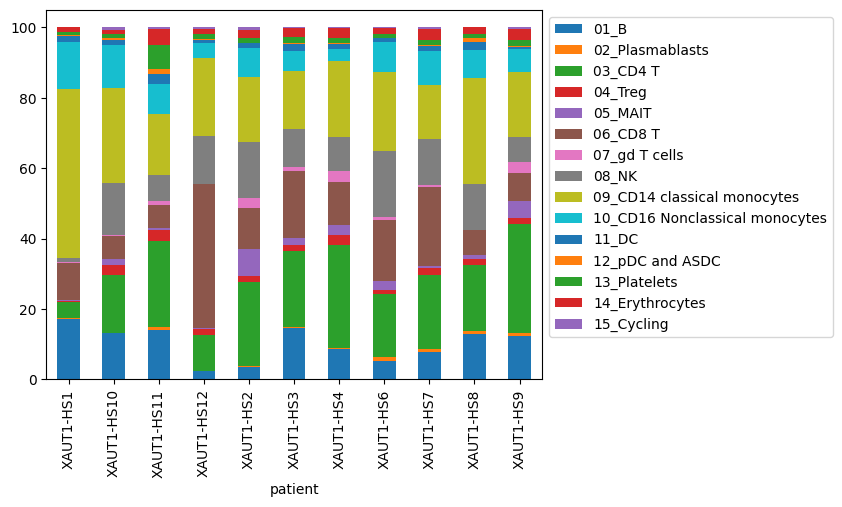

In [187]:
# # Extra: quick plot to visualize cell_type percentages across patients (stacked barplot)
cell_type_percentages.plot(kind='bar',stacked=True,).legend(bbox_to_anchor=(1,1))

## STEP 2. Reshape back to long format

In [188]:
cell_type_percentages.head() # head returns the top 5 rows of the dataframe. It is useful for quickly inspecting the data without overflowing the output display

cell_type,01_B,02_Plasmablasts,03_CD4 T,04_Treg,05_MAIT,06_CD8 T,07_gd T cells,08_NK,09_CD14 classical monocytes,10_CD16 Nonclassical monocytes,11_DC,12_pDC and ASDC,13_Platelets,14_Erythrocytes,15_Cycling
patient,,,,,,,,,,,,,,,
XAUT1-HS1,17.130145,0.222469,4.671858,0.333704,0.111235,10.567297,0.444939,1.001112,48.164627,13.125695,1.668521,0.444939,0.889878,1.223582,NaN
XAUT1-HS10,13.121630,0.119832,16.536848,2.756141,1.617735,6.530857,0.359497,14.679449,27.082085,12.162972,1.497903,0.659077,1.018574,1.078490,0.778910
XAUT1-HS11,14.157527,0.797607,24.426720,3.190429,0.598205,6.281157,1.196411,7.377866,17.347956,8.474576,2.991027,1.495513,6.779661,4.586241,0.299103
XAUT1-HS12,2.300319,0.063898,10.351438,1.597444,0.319489,40.766773,0.063898,13.738019,22.172524,4.153355,0.830671,0.319489,1.533546,1.341853,0.447284
XAUT1-HS2,3.653846,0.224359,23.846154,1.538462,7.692308,11.794872,2.884615,15.801282,18.461538,8.173077,1.410256,0.096154,1.378205,2.339744,0.705128


### `unstack`, `rename` and `reset_index`

In [189]:
## use the unstack() function to reshape the 2D table to 1D (long format).
## Ok to overwrite the same cell_type_percentages dataframe

##############################################################

cell_type_percentages = cell_type_percentages.unstack()



##############################################################

In [190]:
cell_type_percentages # unstacked

cell_type   patient   
01_B        XAUT1-HS1     17.130145
            XAUT1-HS10    13.121630
            XAUT1-HS11    14.157527
            XAUT1-HS12     2.300319
            XAUT1-HS2      3.653846
                            ...    
15_Cycling  XAUT1-HS4      0.283930
            XAUT1-HS6      0.287853
            XAUT1-HS7      0.297114
            XAUT1-HS8           NaN
            XAUT1-HS9      0.407332
Length: 165, dtype: float64

- This returned a **single column** (named 0). The rows are indexed by the combination of cell_type and patient (**MultiIndex**)

In [191]:
## The above column created by unstack() is named '0'. Lets rename it to something more meaningful.
## Since there is only one column we won't need a dictionary (as we did in STEP 0)
## just call .rename with a name of your choice.

## Ok to overwrite the same cell_type_percentages dataframe

######################################################################

cell_type_percentages = cell_type_percentages.rename('percentage')


######################################################################

In [192]:
cell_type_percentages # column renamed

cell_type   patient   
01_B        XAUT1-HS1     17.130145
            XAUT1-HS10    13.121630
            XAUT1-HS11    14.157527
            XAUT1-HS12     2.300319
            XAUT1-HS2      3.653846
                            ...    
15_Cycling  XAUT1-HS4      0.283930
            XAUT1-HS6      0.287853
            XAUT1-HS7      0.297114
            XAUT1-HS8           NaN
            XAUT1-HS9      0.407332
Name: percentage, Length: 165, dtype: float64

In [193]:
## Also the index has multiple levels (MultiIndex [cell_type, patient]).
## Lets reset it by using the .reset_index() function!
## Ok to overwrite the same cell_type_percentages dataframe

######################################################################

cell_type_percentages = cell_type_percentages.reset_index()


######################################################################

In [194]:
cell_type_percentages # index was reset and the 'cell_type' and 'patient' were added to the columns

,cell_type,patient,percentage
0,01_B,XAUT1-HS1,17.130145
1,01_B,XAUT1-HS10,13.121630
2,01_B,XAUT1-HS11,14.157527
3,01_B,XAUT1-HS12,2.300319
4,01_B,XAUT1-HS2,3.653846
...,...,...,...
160,15_Cycling,XAUT1-HS4,0.283930
161,15_Cycling,XAUT1-HS6,0.287853
162,15_Cycling,XAUT1-HS7,0.297114
163,15_Cycling,XAUT1-HS8,NaN


## STEP 3. Add  patient-specific condition information by merging on the patient column

In [195]:
#remember cell_df? It has the information we need!
cell_df

,patient,cell_type,condition
cell_barcode,,,
AAACCTGAGCGCCTTG-1_1,XAUT1-HS2,07_gd T cells,HC
AAACCTGAGTCCTCCT-1_1,XAUT1-HS3,02_Plasmablasts,HC
AAACCTGAGTGTCCAT-1_1,XAUT1-HS4,03_CD4 T,HC
AAACCTGAGTTCGCAT-1_1,XAUT1-HS2,03_CD4 T,HC
AAACCTGCACATGACT-1_1,XAUT1-HS12,06_CD8 T,UCV
...,...,...,...
TTTGTCAGTGACTCAT-1_4,XAUT1-HS9,03_CD4 T,UCV
TTTGTCAGTGGCGAAT-1_4,XAUT1-HS7,09_CD14 classical monocytes,UCNB
TTTGTCAGTTATTCTC-1_4,XAUT1-HS9,01_B,UCV


In [196]:
## Create a dataframe (lets call it patient_to_condition) by selecting the two columns from cell_df
## and calling the function .drop_duplicates(). Let's do both of these in the same line of code
select_columns = ['patient','condition']

######################################################################

patient_to_condition = cell_df[select_columns].drop_duplicates()


######################################################################

In [197]:
patient_to_condition

,patient,condition
cell_barcode,,
AAACCTGAGCGCCTTG-1_1,XAUT1-HS2,HC
AAACCTGAGTCCTCCT-1_1,XAUT1-HS3,HC
AAACCTGAGTGTCCAT-1_1,XAUT1-HS4,HC
AAACCTGCACATGACT-1_1,XAUT1-HS12,UCV
AAACCTGGTGAGGGTT-1_1,XAUT1-HS1,HC
AAACGGGAGAATTGTG-1_1,XAUT1-HS9,UCV
AAACGGGAGCTCCTTC-1_1,XAUT1-HS10,UCV
AAACGGGTCAGCTCGG-1_1,XAUT1-HS6,UCNB
AAACGGGTCTTGAGAC-1_1,XAUT1-HS7,UCNB


> Note that this works for our purposes because we know that each patient maps to one and only condition. We can check if this is the case with: `patient_to_condition.groupby('patient').size().max()`

In [198]:
cell_type_percentages.head()

,cell_type,patient,percentage
0,01_B,XAUT1-HS1,17.130145
1,01_B,XAUT1-HS10,13.121630
2,01_B,XAUT1-HS11,14.157527
3,01_B,XAUT1-HS12,2.300319
4,01_B,XAUT1-HS2,3.653846


### Let's `merge`

In [199]:
## It looks like we can merge the two by joining them on their common column "patient"
## Lets use the .merge() function on the cell_type_percentages dataframe with input patient_to_condition

## Ok to overwrite the same cell_type_percentages dataframe

######################################################################

cell_type_percentages = cell_type_percentages.merge(patient_to_condition)


######################################################################

Note that:
- The `merge()` function would throw an error if there were no common columns between the two dataframes.
- If the two dataframes had more than one column in common, the functions behavior defaults to using the intersection of the columns in both dataframes.
- It is a good practice to specify which column to use with the `merge(...,on='some_column')`.


---

In [200]:
cell_type_percentages

,cell_type,patient,percentage,condition
0,01_B,XAUT1-HS1,17.130145,HC
1,01_B,XAUT1-HS10,13.121630,UCV
2,01_B,XAUT1-HS11,14.157527,UCV
3,01_B,XAUT1-HS12,2.300319,UCV
4,01_B,XAUT1-HS2,3.653846,HC
...,...,...,...,...
160,15_Cycling,XAUT1-HS4,0.283930,HC
161,15_Cycling,XAUT1-HS6,0.287853,UCNB
162,15_Cycling,XAUT1-HS7,0.297114,UCNB
163,15_Cycling,XAUT1-HS8,NaN,UCNB


## Save the processed file

In [201]:
cell_type_percentages.to_csv('patient_cell_type_percentages_with_condition.csv')

In [202]:
# You can now go to the files tab to download your file
# Push this csv file and save this notebook to your github

# Done!